<a href="https://colab.research.google.com/github/GODHYEONJU/MS-AI-School-/blob/main/4_28_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#numpy, pandas, sklearn, matploatlib 임포트
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [ ]:
#sklearn.datasets에 iris데이터 로드
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
data = iris.data #값
label = iris.target #칼럼명
columns = iris.feature_names #속성

In [ ]:
data = pd.DataFrame(data, columns=columns)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
data.shape

(150, 4)

In [ ]:
#데이터 쪼개기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=2023)

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
Ir = LogisticRegression()

In [ ]:
#Training
Ir.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = Ir.predict(X_test) #예측값과 실제값 비교
y_pred

array([2, 1, 1, 2, 1, 2, 1, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 0, 1, 0,
       2, 1, 0, 0, 0, 2, 1, 0])

In [ ]:
y_test

array([2, 1, 1, 2, 1, 2, 1, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 0, 1, 0,
       2, 1, 0, 0, 0, 2, 1, 0])

In [ ]:
#결과 확인
from sklearn.metrics import accuracy_score

In [ ]:
print('Logisitc Regression accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)*100))
print('Logisitc Regression \n계수(w): {0}\n절편(b) : {1}'.format(Ir.coef_, Ir.intercept_))

Logisitc Regression accuracy: 100.00


In [ ]:
#SVC(support vector classifor)
from sklearn.svm import SVC

In [ ]:
for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:
  svc = SVC(C=i)
  svc.fit(X_train, y_train)
  y_pred = svc.predict(X_test)
  print('Support Vector Machine, i = {} 정확도 : {:.2f}'.format(i, accuracy_score(y_test, y_pred)*100))

Support Vector Machine, i = 0.1 정확도 : 90.00
Support Vector Machine, i = 0.2 정확도 : 100.00
Support Vector Machine, i = 0.3 정확도 : 100.00
Support Vector Machine, i = 0.4 정확도 : 100.00
Support Vector Machine, i = 0.5 정확도 : 100.00
Support Vector Machine, i = 0.6 정확도 : 100.00
Support Vector Machine, i = 0.7 정확도 : 100.00
Support Vector Machine, i = 0.8 정확도 : 100.00
Support Vector Machine, i = 0.9 정확도 : 100.00
Support Vector Machine, i = 1 정확도 : 100.00


In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 3)

In [ ]:
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print('Tree 정확도: {:.2f}'.format(accuracy_score(y_test, y_pred)*100))

Tree 정확도: 100.00


In [ ]:
from sklearn.tree import export_graphviz
#파일 저장
export_graphviz(dt, out_file='tree.dot')

In [ ]:
from subprocess import call
call(['dot','-Tpng','tree.dot','-o','decistion-tree.png','-Gdpi=600'])
#graphviz는 그래프를 시각화 하기 위한 오픈소스 도구
#dot : script를 읽어 그래프를 생성
#-Tpng : 출력 형식을 png로 저장
#-o decistion-tree.png : 출력 파일 이름을 decistion-tree.png로 지정
#-Gdpi=600 : 출력 파일의 해상도 600dpi 지정

0

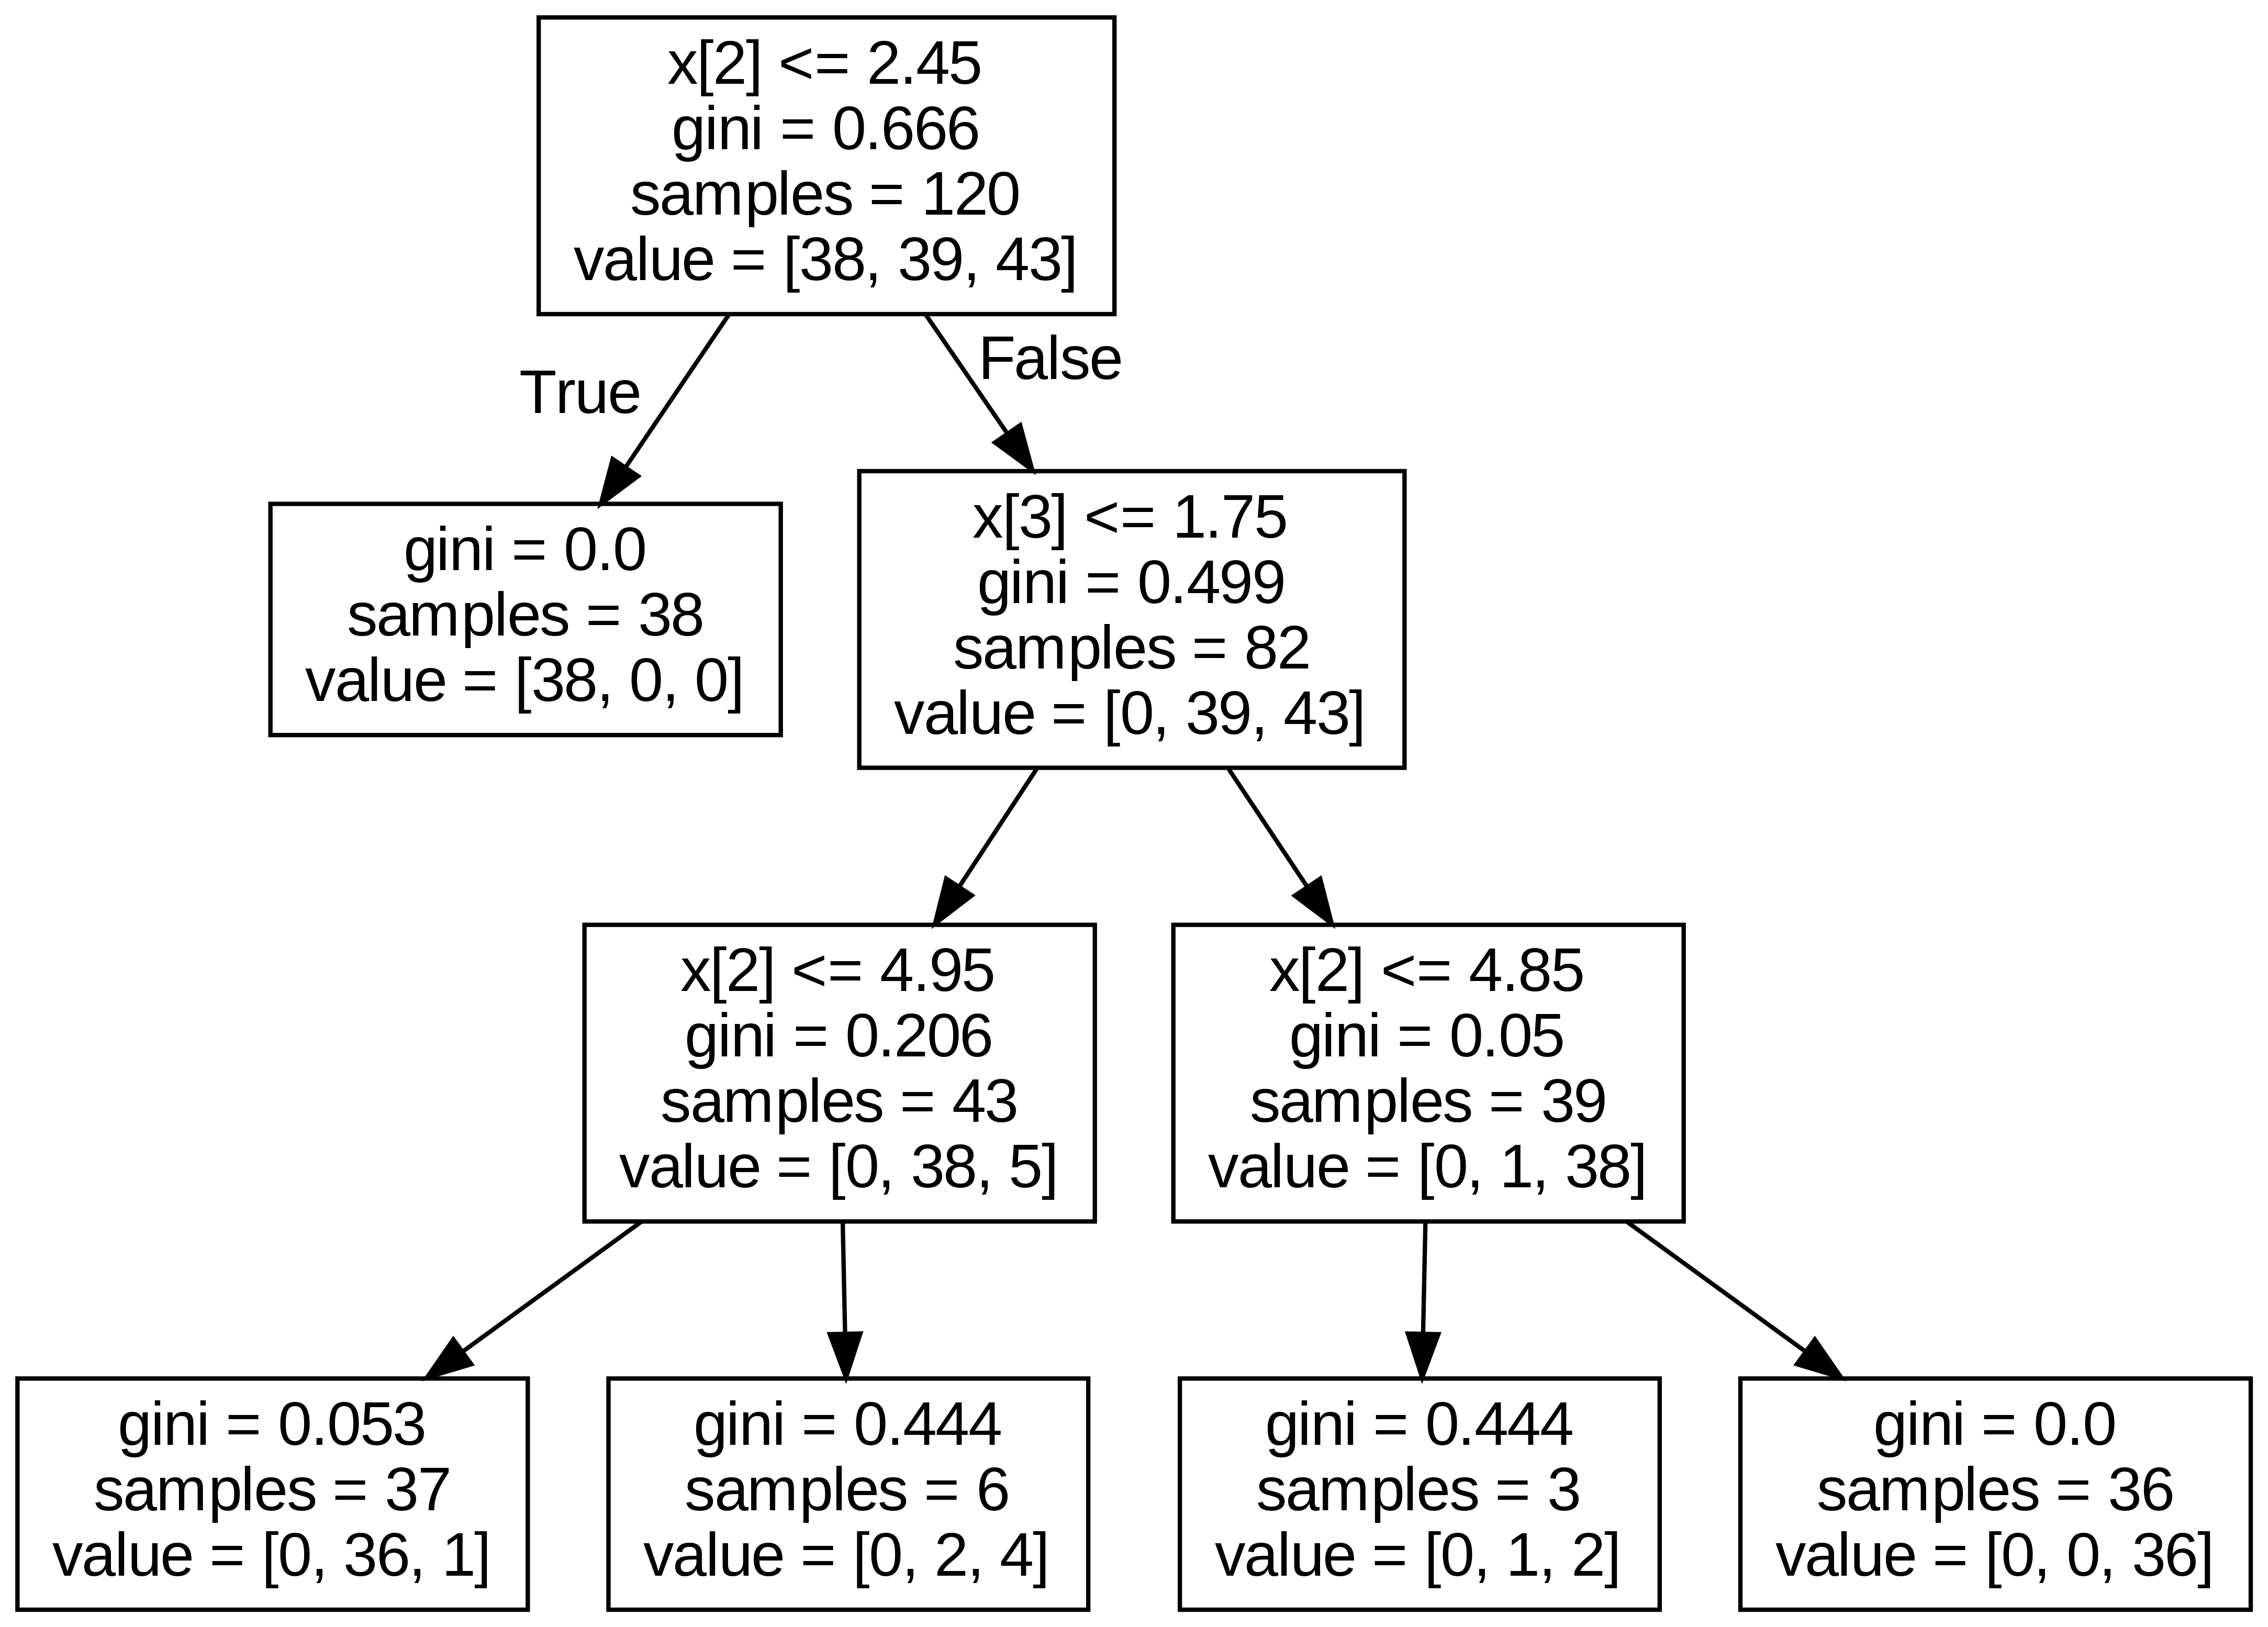

In [ ]:
from IPython.display import Image
Image(filename = 'decistion-tree.png')

In [ ]:
# Forest
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("랜덤 포레스트 정확도 : {:.2f}".format(accuracy_score(y_test, y_pred)*100))

랜덤 포레스트 정확도 : 100.00


In [ ]:
import os
from os.path import join

abalone_path = join('.', 'abalone.txt')
columns_path = join('.', 'abalone_attributes.txt')

abalone_columns = list()
for l in open(columns_path):
  abalone_columns.append(l.strip()) #한줄씩 읽고 strip()공백 제거

In [ ]:
data = pd.read_csv(abalone_path, header=None, names=abalone_columns)
#data.head()
data = data[data['Sex']!='I']

#남자이면 0으로 매핑, 아닐 경우 1로 매핑한 결과를 라벨 변수로 반환
label = data['Sex'].map(lambda x:0 if x =='M' else 1)

del data['Sex']
data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
6,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size = 0.2, random_state=2023)

In [ ]:
rf = RandomForestClassifier(max_depth=5)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

In [ ]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred)))
print('recall: {:.2f}'.format(recall_score(y_test, y_pred)))
print('roc_auc_score: {:.2f}'.format(roc_auc_score(y_test, y_pred)))

Accuracy: 0.52
Precision: 0.50
recall: 0.20
roc_auc_score: 0.51


In [ ]:
best_model_depth = 0
best_model_accuracy = 0

for i in range(2,10):
  rf = RandomForestClassifier(max_depth=i)
  rf.fit(X_train, y_train)
  y_pred = rf.predict(X_test)

  acc = accuracy_score(y_test, y_pred)

  print("Accuracy_scoer : i = {} {:.2f}".format(i, acc*100))

  if best_model_accuracy < acc:
    best_model_depth = i
    best_model_accuracy = acc
  
print('-'*30)
print('best_model_depth={0}, best_model_accuracy = {1}'.format(best_model_depth, best_model_accuracy))
  


Accuracy_scoer : i = 2 52.03
Accuracy_scoer : i = 3 51.50
Accuracy_scoer : i = 4 53.09
Accuracy_scoer : i = 5 52.03
Accuracy_scoer : i = 6 53.79
Accuracy_scoer : i = 7 53.79
Accuracy_scoer : i = 8 53.97
Accuracy_scoer : i = 9 54.67
------------------------------
best_model_depth=9, best_model_accuracy = 0.54673721340388
